In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
file_path = r"C:\Users\Ekiaby\OneDrive\Desktop\amazon_sales_dataset.csv"
df = pd.read_csv(file_path)

df.head()



,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


In [7]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB


In [8]:
# Convert order_date to datetime
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

# Drop rows with missing important values
df = df.dropna(subset=[
    "price",
    "quantity_sold",
    "total_revenue",
    "product_category",
    "customer_region"
])

df.isnull().sum()



order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64

In [9]:
revenue_by_category = (
    df.groupby("product_category")["total_revenue"]
    .sum()
    .sort_values(ascending=False)
)

revenue_by_category


product_category
Beauty            5550624.97
Books             5484863.03
Fashion           5480123.34
Home & Kitchen    5473132.55
Electronics       5470594.03
Sports            5407235.82
Name: total_revenue, dtype: float64

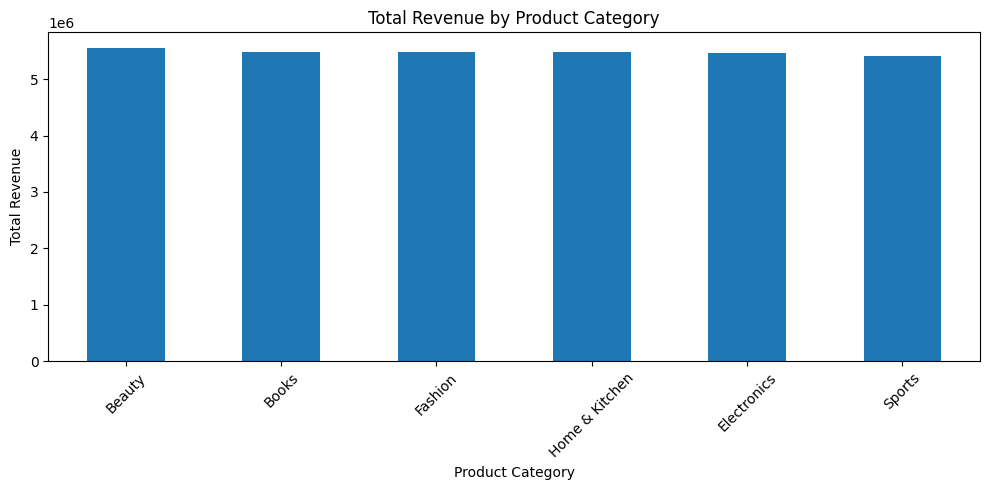

In [10]:
plt.figure(figsize=(10,5))
revenue_by_category.plot(kind="bar")
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


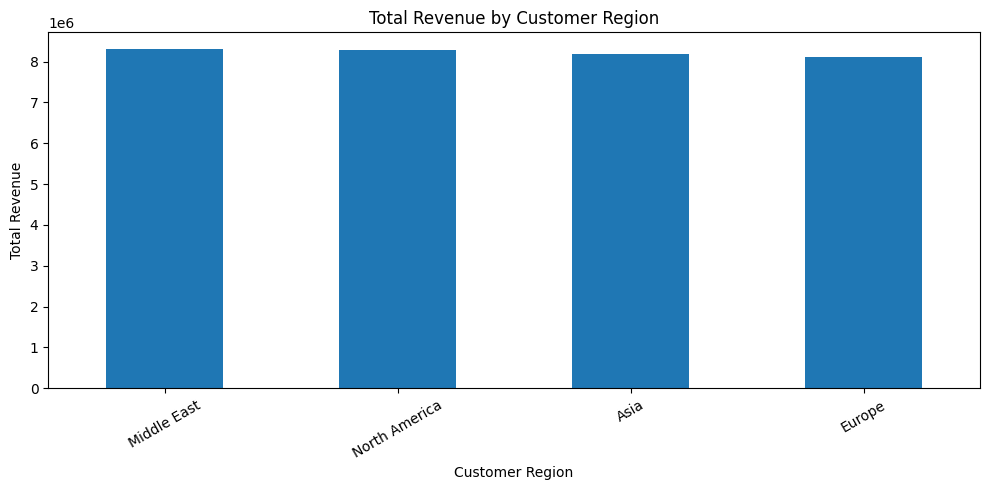

In [11]:
revenue_by_region = (
    df.groupby("customer_region")["total_revenue"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
revenue_by_region.plot(kind="bar")
plt.title("Total Revenue by Customer Region")
plt.xlabel("Customer Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


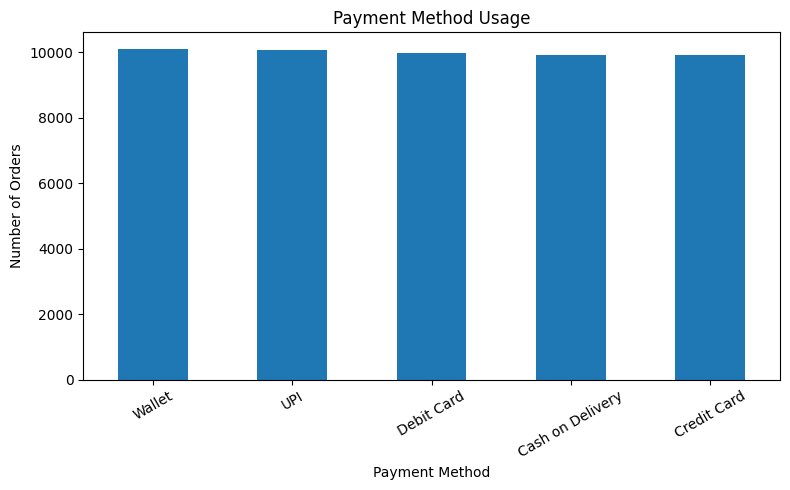

In [12]:
payment_counts = df["payment_method"].value_counts()

plt.figure(figsize=(8,5))
payment_counts.plot(kind="bar")
plt.title("Payment Method Usage")
plt.xlabel("Payment Method")
plt.ylabel("Number of Orders")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


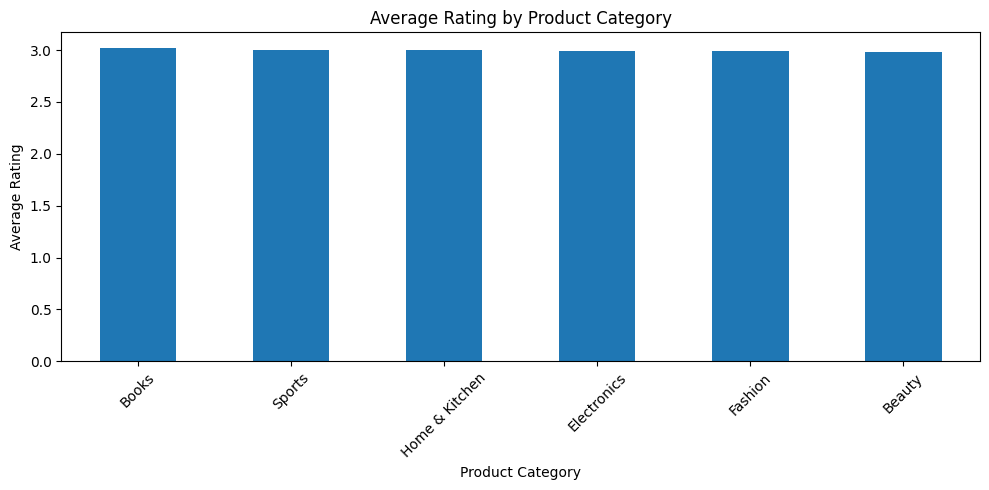

In [13]:
avg_rating_category = (
    df.groupby("product_category")["rating"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
avg_rating_category.plot(kind="bar")
plt.title("Average Rating by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


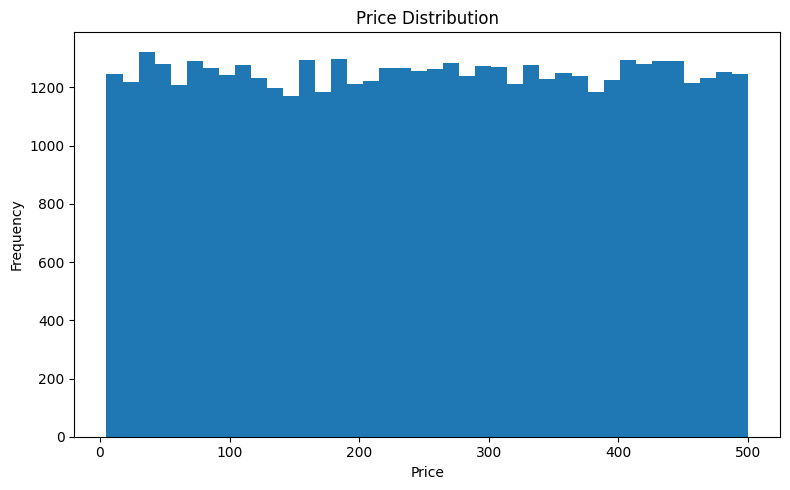

In [14]:
plt.figure(figsize=(8,5))
plt.hist(df["price"], bins=40)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


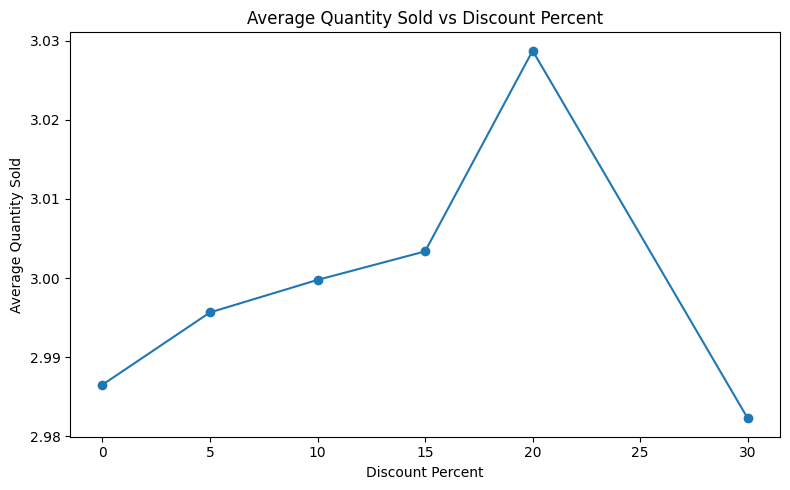

In [15]:
discount_vs_quantity = (
    df.groupby("discount_percent")["quantity_sold"]
    .mean()
)

plt.figure(figsize=(8,5))
discount_vs_quantity.plot(kind="line", marker="o")
plt.title("Average Quantity Sold vs Discount Percent")
plt.xlabel("Discount Percent")
plt.ylabel("Average Quantity Sold")
plt.tight_layout()
plt.show()
